<a href="https://colab.research.google.com/github/sumitra288/ML-LAB-A1-G3-/blob/main/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [3]:
linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_val_scaled)

print("Linear SVM Classification Report:\n", classification_report(y_val, y_pred_linear))
print("Linear SVM Accuracy:", accuracy_score(y_val, y_pred_linear))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

Linear SVM Accuracy: 0.8533333333333334


In [4]:
rbf_model = SVC(kernel='rbf', random_state=42)
rbf_model.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_model.predict(X_val_scaled)

print("RBF SVM Classification Report:\n", classification_report(y_val, y_pred_rbf))
print("RBF SVM Accuracy:", accuracy_score(y_val, y_pred_rbf))

poly_model = SVC(kernel='poly', degree=3, random_state=42)
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_val_scaled)

print("Poly SVM Classification Report:\n", classification_report(y_val, y_pred_poly))
print("Poly SVM Accuracy:", accuracy_score(y_val, y_pred_poly))


RBF SVM Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

RBF SVM Accuracy: 0.9466666666666667
Poly SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        75
           1       0.92      0.81      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150

Poly SVM Accuracy: 0.8733333333333333


In [5]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10

Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.93      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



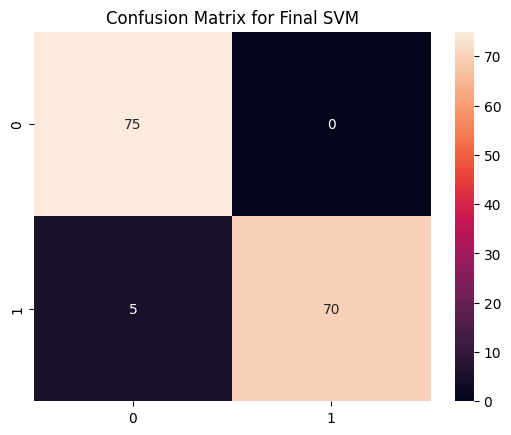

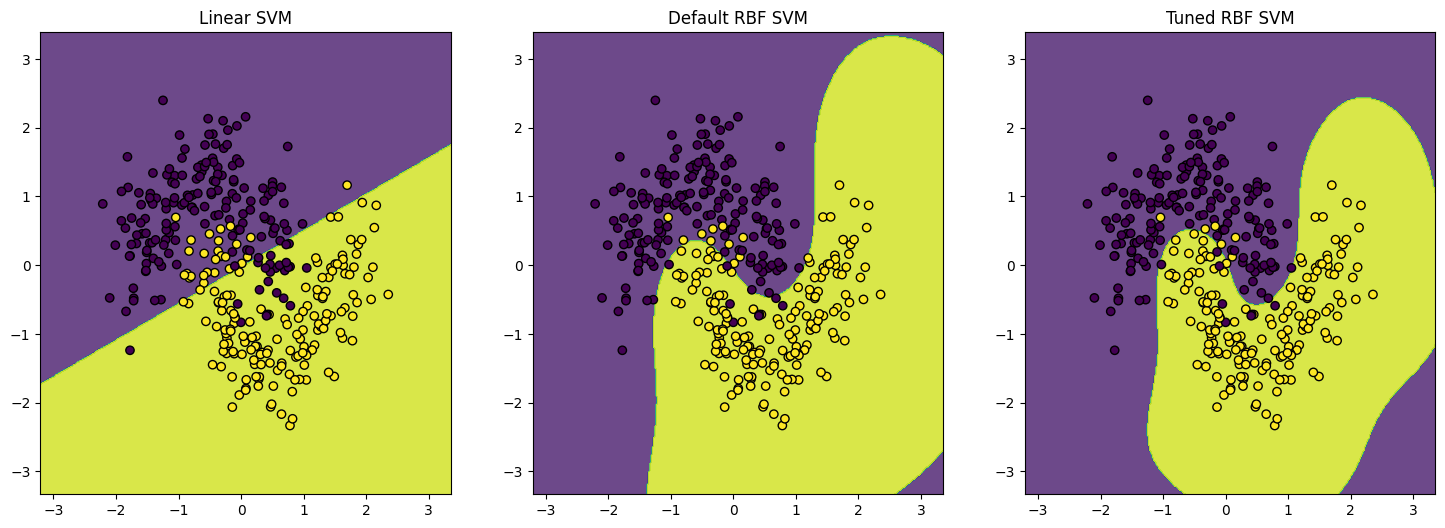

In [7]:
final_predictions = grid.predict(X_val_scaled)
print("Final Model Classification Report:\n", classification_report(y_val, final_predictions))
conf_mat = confusion_matrix(y_val, final_predictions)

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Confusion Matrix for Final SVM')
plt.show()

def plot_decision_boundary(clf, X, y, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundary(linear_model, X_train_scaled, y_train, axes[0], 'Linear SVM')
plot_decision_boundary(rbf_model, X_train_scaled, y_train, axes[1], 'Default RBF SVM')
plot_decision_boundary(grid.best_estimator_, X_train_scaled, y_train, axes[2], 'Tuned RBF SVM')
plt.show()
